<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:


In [1]:
#import itertools
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
#import matplotlib.ticker as ticker
from sklearn import preprocessing
#%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Lets download the dataset


In [2]:
#!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'


### Load Data From CSV File


In [3]:
#df = pd.read_csv('loan_train.csv')
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])

#drop unnamed columns
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)

df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set 


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

In [8]:
import seaborn as sns

#bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
#g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
#g.map(plt.hist, 'Principal', bins=bins, ec="k")

#g.axes[-1].legend()
#plt.show()

In [9]:
#bins = np.linspace(df.age.min(), df.age.max(), 10)
#g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
#g.map(plt.hist, 'age', bins=bins, ec="k")

#g.axes[-1].legend()
#plt.show()

# Pre-processing:  Feature selection/extraction


### Lets look at the day of the week people get the loan


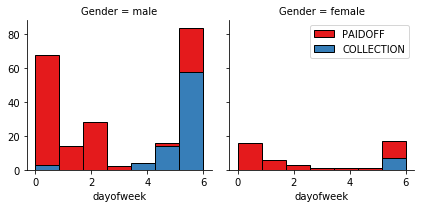

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek

#bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 8)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 


In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Lets look at gender:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding


In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection


Lets defind feature sets, X:


In [17]:
X1 = Feature
X1[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split )


In [19]:
X = preprocessing.StandardScaler().fit(X1).transform(X1)
X1[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

-   K Nearest Neighbor(KNN)
-   Decision Tree
-   Support Vector Machine
-   Logistic Regression

** Notice:** 

-   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
-   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
-   You should include the code of the algorithm in the following cells.


## NOTE: I am defining a function to print metrics for each algorithm

In [20]:
# Since we are going to be printing the metrics for each algorithm, let's define a function to do that.

def print_metrics(y_test,y_pred):
    
    # confusion matrix between y_test and itself (for comparison)
    
    cm = metrics.confusion_matrix(y_test,y_test)
    print('Confusion matrix (between y_test and itself, for comparison):')
    print(cm)
    
    # Confusion matrix between y_test and y_pred

    cm = metrics.confusion_matrix(y_test,y_pred)
    print('\nConfusion matrix (between y_test and y_pred):')
    print(cm)

    # Jaccard score
    
    J = metrics.jaccard_score(y_test=='PAIDOFF', y_pred=='PAIDOFF')
    #J = cm.trace()/cm.sum()
    J = np.round(J,4)
    print('\nJaccard score:', J)

    # F1-score
    
    F = metrics.f1_score(y_test,y_pred,average='weighted')
    F = np.round(F,4)
    print('F1-score:',F)
    
    return J,F
    
#print_metrics(y_test,y_pred)

# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [21]:
# save seed for repoducibility

seed = np.random.randint(2**30)
np.random.RandomState(seed = seed)
print('seed =',seed)

# train test split loan data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)

seed = 197705180
x_train shape: (276, 8)
x_test shape: (70, 8)


Maximum Accuracy = 0.7857
Corresponding k = 5


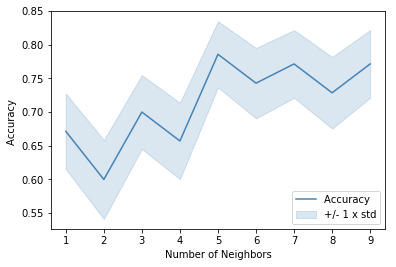

In [22]:
# find the best k:
# loop over different k values and find the one with the best accuracy

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks=10
K = np.arange(1,Ks)
acc = np.zeros(len(K))
std = np.zeros(len(K))

for k in K:
    knn = KNeighborsClassifier(k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    cm = metrics.confusion_matrix(y_test,y_pred)
    acc[k-1] = np.trace(cm)/np.sum(cm)
    std[k-1] = np.std(y_pred==y_test)/np.sqrt(len(y_pred))

    
# print max accuracy and corresponding k

kmax = K[np.where(acc==np.max(acc))][0]
print('Maximum Accuracy =', np.round(np.max(acc),4))
print('Corresponding k =',kmax)

# plot graph of accuracy vs k

plt.plot(K,acc,'steelblue')
plt.fill_between(range(1,Ks), acc - 1*std, acc + 1*std, alpha=0.20, color='steelblue')
plt.legend(('Accuracy ', '+/- 1 x std','+/- 3 x std'), loc='lower right')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors')
plt.show()

In [23]:
# build KNN model using best k

knn = KNeighborsClassifier(k)
knn.fit(x_train,y_train)

# make predictions

y_pred = knn.predict(x_test)

# print metrics

print_metrics(y_test,y_pred)

Confusion matrix (between y_test and itself, for comparison):
[[16  0]
 [ 0 54]]

Confusion matrix (between y_test and y_pred):
[[ 6 10]
 [ 6 48]]

Jaccard score: 0.75
F1-score: 0.7592


(0.75, 0.7592)

# Decision Tree


In [24]:
# build the model

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=6)
dtree.fit(x_train,y_train)

# make predictions

y_pred = dtree.predict(x_test)

# print metrics

print_metrics(y_test,y_pred)


Confusion matrix (between y_test and itself, for comparison):
[[16  0]
 [ 0 54]]

Confusion matrix (between y_test and y_pred):
[[ 6 10]
 [10 44]]

Jaccard score: 0.6875
F1-score: 0.7143


(0.6875, 0.7143)

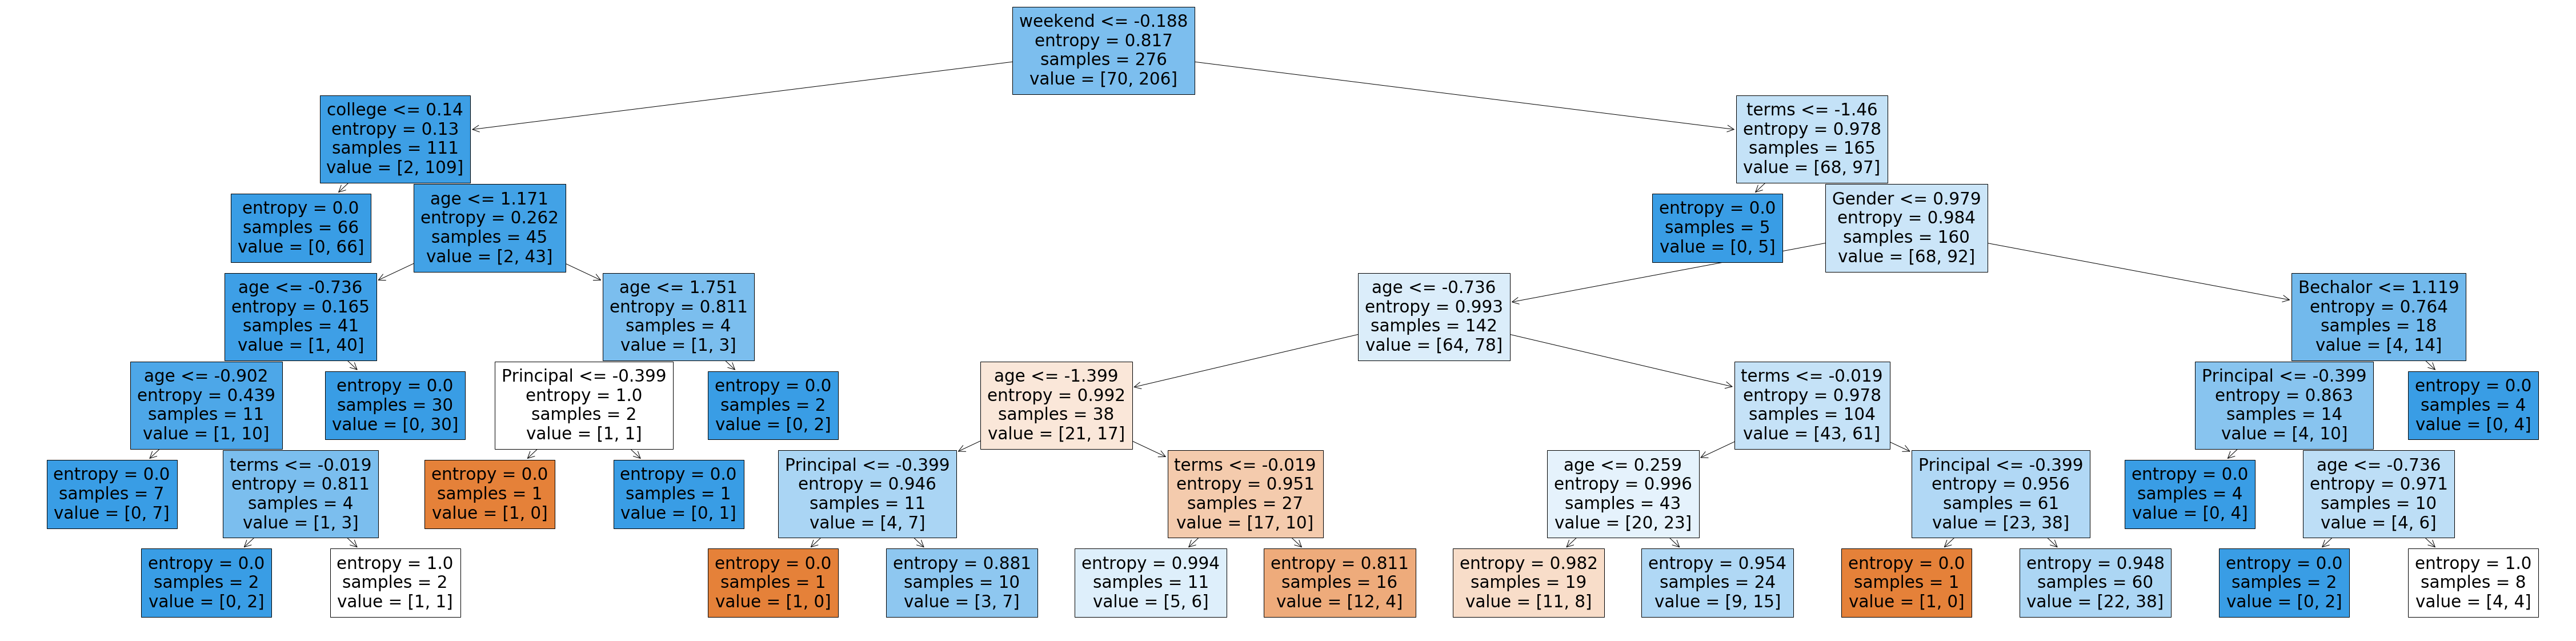

In [25]:
# graph of decision tree

from sklearn import tree
plt.figure(figsize=(80,20))
tree.plot_tree(dtree, feature_names=X1.columns, filled=True)
plt.show()


# Support Vector Machine


In [26]:
# build the model
from sklearn.svm import SVC
svec = SVC(kernel='rbf')
svec.fit(x_train,y_train)

# make predictions
y_pred = svec.predict(x_test)

# print metrics
print_metrics(y_test,y_pred)

Confusion matrix (between y_test and itself, for comparison):
[[16  0]
 [ 0 54]]

Confusion matrix (between y_test and y_pred):
[[ 1 15]
 [ 0 54]]

Jaccard score: 0.7826
F1-score: 0.7042


(0.7826, 0.7042)

# Logistic Regression


In [27]:
# build the model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(x_train,y_train)

# make predictions
y_pred = LR.predict(x_test)

# print metrics
print_metrics(y_test,y_pred)

# find logloss
y_prob = LR.predict_proba(x_test)
logloss = metrics.log_loss(y_test=='PAIDOFF',y_prob)
logloss = np.round(logloss,4)
print('LogLoss:',logloss)

Confusion matrix (between y_test and itself, for comparison):
[[16  0]
 [ 0 54]]

Confusion matrix (between y_test and y_pred):
[[ 0 16]
 [ 0 54]]

Jaccard score: 0.7714
F1-score: 0.6719
LogLoss: 0.5551


# Model Evaluation using Test set


In [28]:
#from sklearn.metrics import jaccard_score
#from sklearn.metrics import f1_score
#from sklearn.metrics import log_loss


First, download and load the test set:


In [29]:
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv'
    

### Load Test set for evaluation


In [30]:
#test_df = pd.read_csv('loan_test.csv')
test_df = pd.read_csv(url)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [31]:
# process the test set the same way we processed the data set

# convert to datetime object
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

# drop unnamed columns
test_df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)

# extract day of week
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

# extract weekend
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

# convert gender to numerical
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

# pick features
test_Feature = df[['Principal','terms','age','Gender','weekend']]

# apply one hot encoding to education
test_Feature = pd.concat([test_Feature,pd.get_dummies(df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)

# feature matrix
test_X1 = test_Feature
#test_X[0:5]

# target column
test_y = df['loan_status'].values
#Y[0:5]


In [32]:
# make sure the columns and data types from dataset and testset are similar
X1.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [33]:
test_X1.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [34]:
# standardize
test_X = preprocessing.StandardScaler().fit(test_X1).transform(test_X1)
#test_X[0:5]

In [35]:
# evaluate using the models we built

# NOTE: 
# the matrices from "train-test-split" are called x_test, y_test, y_pred
# the matrices from "test set" are called test_X, test_y, pred_y

# create a matrix to record results
R = np.empty([4,3])
R[:] = np.nan

In [36]:
# k nearest neighbors evaluation 

pred_y = knn.predict(test_X)
R[0][0],R[0][1] = print_metrics(test_y,pred_y)


Confusion matrix (between y_test and itself, for comparison):
[[ 86   0]
 [  0 260]]

Confusion matrix (between y_test and y_pred):
[[ 31  55]
 [ 17 243]]

Jaccard score: 0.7714
F1-score: 0.7695


In [37]:
# Decision tree evaluation

pred_y = dtree.predict(test_X)
R[1][0],R[1][1] = print_metrics(test_y,pred_y)


Confusion matrix (between y_test and itself, for comparison):
[[ 86   0]
 [  0 260]]

Confusion matrix (between y_test and y_pred):
[[ 37  49]
 [ 27 233]]

Jaccard score: 0.754
F1-score: 0.7687


In [38]:
# Support vector machine evaluation

pred_y = svec.predict(test_X)
R[2][0],R[2][1] = print_metrics(test_y,pred_y)


Confusion matrix (between y_test and itself, for comparison):
[[ 86   0]
 [  0 260]]

Confusion matrix (between y_test and y_pred):
[[  3  83]
 [  0 260]]

Jaccard score: 0.758
F1-score: 0.6648


In [39]:
# Logistic regression evaluation

pred_y = LR.predict(test_X)
prob_y = LR.predict_proba(test_X)

R[3][0],R[3][1] = print_metrics(test_y,pred_y)

#find logloss

logloss = metrics.log_loss(test_y=='PAIDOFF',prob_y)
logloss = np.round(logloss,4)
print('Log loss =', logloss,'\n')

R[3][2] = logloss


Confusion matrix (between y_test and itself, for comparison):
[[ 86   0]
 [  0 260]]

Confusion matrix (between y_test and y_pred):
[[  0  86]
 [  0 260]]

Jaccard score: 0.7514
F1-score: 0.6448
Log loss = 0.5583 



# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


In [40]:
# print report

report = pd.DataFrame(data=R, columns=[['Jaccard','F1-score','LogLoss']], 
                      index=[['KNN','Decision Tree','SVM','Logistic Regression']])
report

,Jaccard,F1-score,LogLoss
KNN,0.7714,0.7695,NaN
Decision Tree,0.7540,0.7687,NaN
SVM,0.7580,0.6648,NaN
Logistic Regression,0.7514,0.6448,0.5583


In [41]:
# The above are my final evaluation metrics for the algorithms, using test set

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
